In [1]:
# ===========================================
# Final Team Project - Full Machine Learning Pipeline
# ===========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve, auc
)
import os
from scipy.stats import yeojohnson
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [39]:
# Download second data set from GitHub
!wget https://github.com/vxdao01/504/tree/main/census-income

--2025-08-12 01:50:36--  https://github.com/vxdao01/504/tree/main/census-income
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
census-income: Is a directory

Cannot write to ‘census-income’ (Success).


In [40]:
!apt-get install git-lfs
!git lfs install
!git clone https://github.com/vxdao01/504
%cd 504
!git lfs pull

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Updated git hooks.
Git LFS initialized.
Cloning into '504'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 133 (delta 72), reused 34 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (133/133), 2.18 MiB | 10.03 MiB/s, done.
Resolving deltas: 100% (72/72), done.
/content/504/504


In [ ]:
#!git checkout modeling

Branch 'modeling' set up to track remote branch 'modeling' from 'origin'.
Switched to a new branch 'modeling'


In [6]:
#!pwd
#!ls
# os.chdir('/content/drive/My Drive/Colab Notebooks/ADS-504-Final-Project')

504-final-project.ipynb  csv_pca	      final_project_report_APA7.docx
census-income		 final-edit-cv.ipynb
census+income.zip	 final-edit.ipynb


In [7]:
# === NEW GOOGLE COLAB FILE PATHS ===
train_path = "/content/504/census-income/adult.data"
test_path = "/content//504/census-income/adult.test"

# === FILE PATHS ===
# train_path = r"C:\Users\User\Downloads\census+income\adult.data"
# test_path = r"C:\Users\User\Downloads\census+income\adult.test"

In [8]:
# === COLUMN NAMES ===
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]

# === 1. DATASET INTRODUCTION ===
print("📌 PROJECT INTRODUCTION:")
print("""
The goal of this project is to predict whether an individual earns more than $50K per year
based on demographic and employment attributes from the UCI Adult Census dataset.

This problem is important because it demonstrates how demographic and employment features
can be leveraged to identify income patterns. Machine learning models can help in policy-making,
targeted services, and socio-economic research by revealing key factors that influence income levels.
""")

# === LOAD DATA ===
df_train = pd.read_csv(train_path, header=None, names=columns, na_values=" ?", skipinitialspace=True)
df_test = pd.read_csv(test_path, header=None, names=columns, na_values=" ?", skipinitialspace=True, comment='|', skiprows=1)
df = pd.concat([df_train, df_test], ignore_index=True)

print(f"\n✅ Dataset loaded successfully. Shape: {df.shape}")

# === VARIABLE DESCRIPTIONS ===
var_desc = pd.DataFrame({
    "Feature": columns,
    "Description": [
        "Age of the individual",
        "Type of employment",
        "Census final weight (sample size indicator)",
        "Highest level of education attained",
        "Number of years of education",
        "Marital status",
        "Occupation type",
        "Relationship status",
        "Race",
        "Gender",
        "Capital gain",
        "Capital loss",
        "Average hours worked per week",
        "Country of origin",
        "Income class (<=50K or >50K)"
    ],
    "Type": ["Numeric", "Categorical", "Numeric", "Categorical", "Numeric", "Categorical",
             "Categorical", "Categorical", "Categorical", "Categorical", "Numeric",
             "Numeric", "Numeric", "Categorical", "Target"]
})
print("\n📊 Variable Descriptions:")
print(var_desc)

# === 2. PREPROCESSING ===
print("\n🧹 PREPROCESSING STARTED...")

# Drop missing values
df.dropna(inplace=True)

# Remove extra spaces
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Fix target variable encoding
df["income"] = df["income"].replace({">50K.": ">50K", "<=50K.": "<=50K"}).map({"<=50K": 0, ">50K": 1})

# Remove duplicates
df.drop_duplicates(inplace=True)

print(f"✅ Data cleaned. New shape: {df.shape}")

📌 PROJECT INTRODUCTION:

The goal of this project is to predict whether an individual earns more than $50K per year
based on demographic and employment attributes from the UCI Adult Census dataset.

This problem is important because it demonstrates how demographic and employment features
can be leveraged to identify income patterns. Machine learning models can help in policy-making,
targeted services, and socio-economic research by revealing key factors that influence income levels.


✅ Dataset loaded successfully. Shape: (48842, 15)

📊 Variable Descriptions:
           Feature                                  Description         Type
0              age                        Age of the individual      Numeric
1        workclass                           Type of employment  Categorical
2           fnlwgt  Census final weight (sample size indicator)      Numeric
3        education          Highest level of education attained  Categorical
4    education_num                 Number of year

/tmp/ipython-input-4135311693.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


✅ Data cleaned. New shape: (48790, 15)


In [41]:
# Read ACS PUMS data for California into dataframe
df2 = pd.read_csv('csv_pca/psam_p06.csv')

In [42]:
print(df2.head())

  RT       SERIALNO  DIVISION  SPORDER  PUMA  REGION  STATE   ADJINC  PWGTP  \
0  P  2023GQ0000009         9        1  5924       4      6  1019518     85   
1  P  2023GQ0000028         9        1  8515       4      6  1019518     60   
2  P  2023GQ0000030         9        1  2500       4      6  1019518     27   
3  P  2023GQ0000033         9        1  5916       4      6  1019518     23   
4  P  2023GQ0000052         9        1  8106       4      6  1019518     51   

   AGEP  ...  PWGTP71  PWGTP72  PWGTP73  PWGTP74  PWGTP75  PWGTP76  PWGTP77  \
0    19  ...       12       79       82       79       13       86      146   
1    23  ...       10       63       57       65       64        8       58   
2    35  ...       40       27       28       22        6       28        6   
3    60  ...       24       24       22       24       23       23       24   
4    23  ...       57       44      110       58      106       10        6   

   PWGTP78  PWGTP79  PWGTP80  
0       83       13

In [43]:
# List all column names for ACS PUMS data
print(df2.columns.tolist())

['RT', 'SERIALNO', 'DIVISION', 'SPORDER', 'PUMA', 'REGION', 'STATE', 'ADJINC', 'PWGTP', 'AGEP', 'CIT', 'CITWP', 'COW', 'DDRS', 'DEAR', 'DEYE', 'DOUT', 'DPHY', 'DRAT', 'DRATX', 'DREM', 'ENG', 'FER', 'GCL', 'GCM', 'GCR', 'HIMRKS', 'HINS1', 'HINS2', 'HINS3', 'HINS4', 'HINS5', 'HINS6', 'HINS7', 'INTP', 'JWMNP', 'JWRIP', 'JWTRNS', 'LANX', 'MAR', 'MARHD', 'MARHM', 'MARHT', 'MARHW', 'MARHYP', 'MIG', 'MIL', 'MLPA', 'MLPB', 'MLPCD', 'MLPE', 'MLPFG', 'MLPH', 'MLPIK', 'MLPJ', 'NWAB', 'NWAV', 'NWLA', 'NWLK', 'NWRE', 'OIP', 'PAP', 'RELSHIPP', 'RETP', 'SCH', 'SCHG', 'SCHL', 'SEMP', 'SEX', 'SSIP', 'SSP', 'WAGP', 'WKHP', 'WKL', 'WKWN', 'WRK', 'YOEP', 'ANC', 'ANC1P', 'ANC2P', 'DECADE', 'DIS', 'DRIVESP', 'ESP', 'ESR', 'FOD1P', 'FOD2P', 'HICOV', 'HISP', 'INDP', 'JWAP', 'JWDP', 'LANP', 'MIGPUMA', 'MIGSP', 'MSP', 'NAICSP', 'NATIVITY', 'NOP', 'OC', 'OCCP', 'PAOC', 'PERNP', 'PINCP', 'POBP', 'POVPIP', 'POWPUMA', 'POWSP', 'PRIVCOV', 'PUBCOV', 'QTRBIR', 'RAC1P', 'RAC2P', 'RAC3P', 'RACAIAN', 'RACASN', 'RACBLK', 

In [44]:
# List of columns to keep
cols_to_keep = [
    'AGEP',
'SEX',
'RAC1P',
'HISP',
'PINCP',
'SCHL',
'CIT',
'NATIVITY',
'YOEP',
'MSP',
'ESR',
'MAR',
'OCCP',
'INDP',
'WKHP',
'DIS',
'REGION',
    ]

In [45]:
# Select only those columns (drops others automatically)
df3 = df2[cols_to_keep]

In [46]:
# Select only numeric columns from df3
df_num = df3.select_dtypes(include=np.number)

# Describe the specified numeric columns
columns_to_describe = ['AGEP', 'PINCP', 'WKHP']
display(df_num[columns_to_describe].describe())

,AGEP,PINCP,WKHP
count,392318.000000,3.342760e+05,204382.000000
mean,42.051512,5.898234e+04,37.221698
std,23.435959,9.135569e+04,13.024006
min,0.000000,-9.600000e+03,1.000000
25%,22.000000,8.300000e+03,32.000000
50%,41.000000,3.150000e+04,40.000000
75%,61.000000,7.500000e+04,40.000000
max,94.000000,1.545200e+06,99.000000


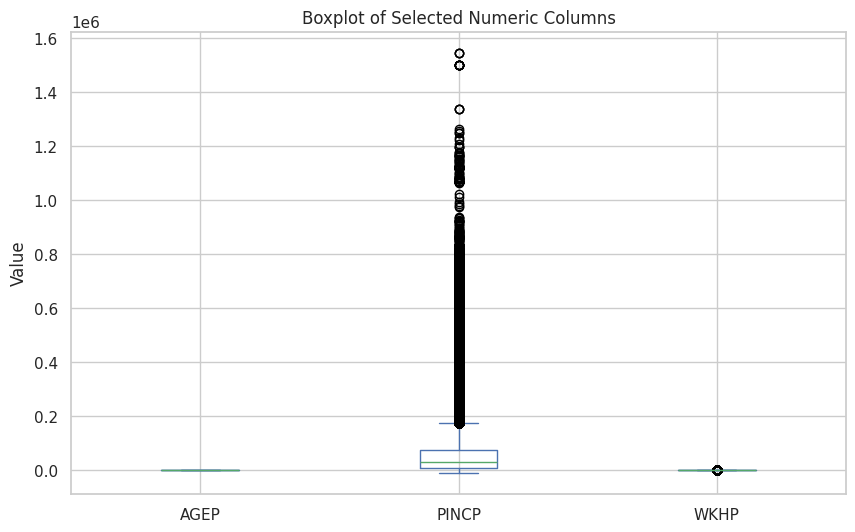

In [47]:
# Create a boxplot for these columns
df_num[columns_to_describe].plot(kind='box', figsize=(10, 6))

plt.title('Boxplot of Selected Numeric Columns')
plt.ylabel('Value')
plt.show()

In [48]:
#Count nulls in dataframe
null_counts = df3.isnull().sum()
print(null_counts)

AGEP             0
SEX              0
RAC1P            0
HISP             0
PINCP        58042
SCHL          9980
CIT              0
NATIVITY         0
YOEP        279878
MSP          58042
ESR          62889
MAR              0
OCCP        157102
INDP        157102
WKHP        187936
DIS              0
REGION           0
dtype: int64


In [49]:
# Calculate IQR to determine a range that does not include outliers. This range will be used to select random numbers to fill NaN values in PINCP so that Yeo-Johnson
# transformation can be used on PINCP, the target variable.
Q1 = 8300
Q3 = 75000

IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-91750.0
175050.0


In [50]:
df_clean = df3.dropna(subset=['PINCP'])

# Check the new shape
print("Shape before:", df3.shape)
print("Shape after:", df_clean.shape)

Shape before: (392318, 17)
Shape after: (334276, 17)


In [51]:
df3 = df_clean.copy()

In [52]:
# Detect outliers to maximized effect of Yeo-Johnson transformation
# Remove outliers
outliers = df3[(df3['PINCP'] < lower_bound) | (df3['PINCP'] > upper_bound)]

print(f"Number of outliers detected: {outliers.shape[0]}")

# Remove outliers
df_no_outliers = df3[(df3['PINCP'] >= lower_bound) & (df3['PINCP'] <= upper_bound)]

print(f"Data shape before removing outliers: {df3.shape}")
print(f"Data shape after removing outliers: {df_no_outliers.shape}")

Number of outliers detected: 22197
Data shape before removing outliers: (334276, 17)
Data shape after removing outliers: (312079, 17)


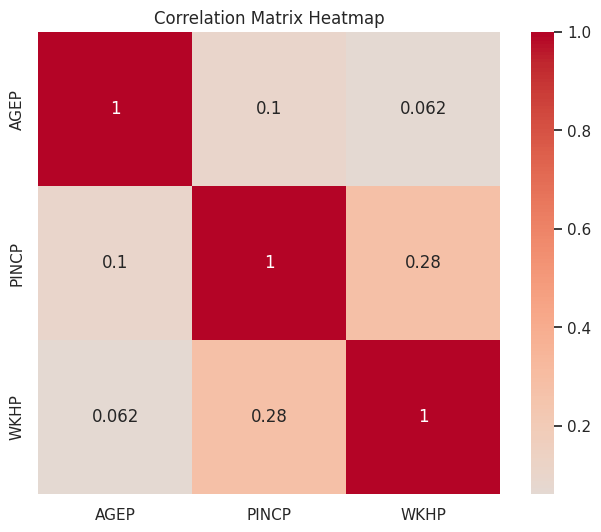

In [53]:
# Calculate correlation matrix for this subset
corr_matrix = df_num[columns_to_describe].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [54]:
# The target variable pincp is skewed and has negative and zero values, so we will apply a Yeo-Johnson transformation
df_no_outliers.loc[:, 'PINCP_yeojohnson'], lambda_ = yeojohnson(df_no_outliers['PINCP'])

print("Lambda:", lambda_)

Lambda: 0.7440958504171319


/tmp/ipython-input-1024974280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[:, 'PINCP_yeojohnson'], lambda_ = yeojohnson(df_no_outliers['PINCP'])


In [55]:
df_num = df_no_outliers.select_dtypes(include=np.number)

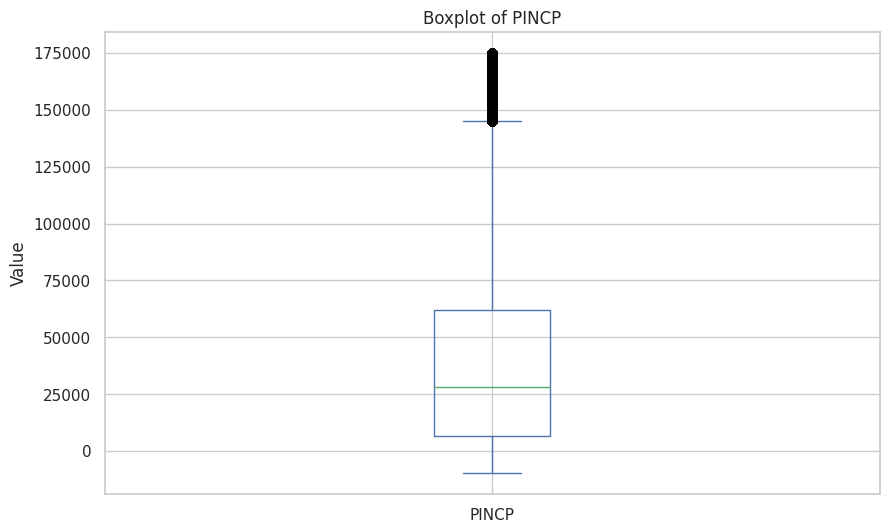

In [56]:
# Create a boxplot for the PINCP column
df_no_outliers['PINCP'].plot(kind='box', figsize=(10, 6))

plt.title('Boxplot of PINCP')
plt.ylabel('Value')
plt.show()

In [57]:
# One-hot encode categorical columns

# Copy clean data set
df_encoded = df_no_outliers.copy()

# Get the list of columns that are NOT numeric
non_num_cols = df_no_outliers.columns.difference(df_num.columns)

for col in non_num_cols:
    print(f"Encoding {col} ...")

    # Generate dummies for ONE column
    dummies = pd.get_dummies(df_encoded[col], prefix=col, dtype=np.uint8)

    # Drop original column and join dummies
    df_encoded = pd.concat([df_encoded.drop(columns=[col]), dummies], axis=1)

print("Final encoded shape:", df_encoded.shape)


Final encoded shape: (312079, 18)


In [26]:
# Save cleaned raw dataset
# Update to use your local file path
# df.to_csv(r"C:\Users\User\Downloads\census+income\cleaned_raw_full.csv", index=False)
df.to_csv(r"C:\Users\celin\OneDrive\Education\USD-MS-ADS\ADS-504\Final-Project\cleaned_raw_full.csv", index=False)

After running the cell above and successfully mounting your Google Drive, run the following code to update the file paths in the first code cell to access the datasets directly from your Drive. Remember to replace the placeholder paths with the actual paths to your files within your Google Drive.

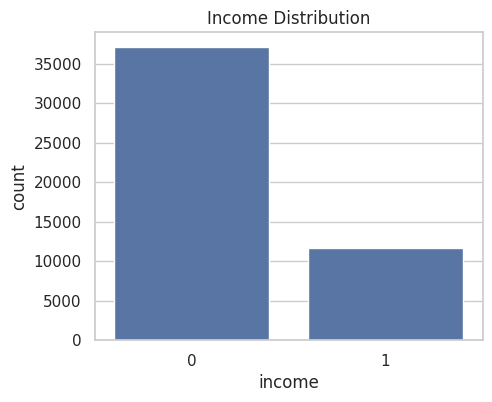


🔍 Insight: The dataset is imbalanced, with the majority earning <=50K.


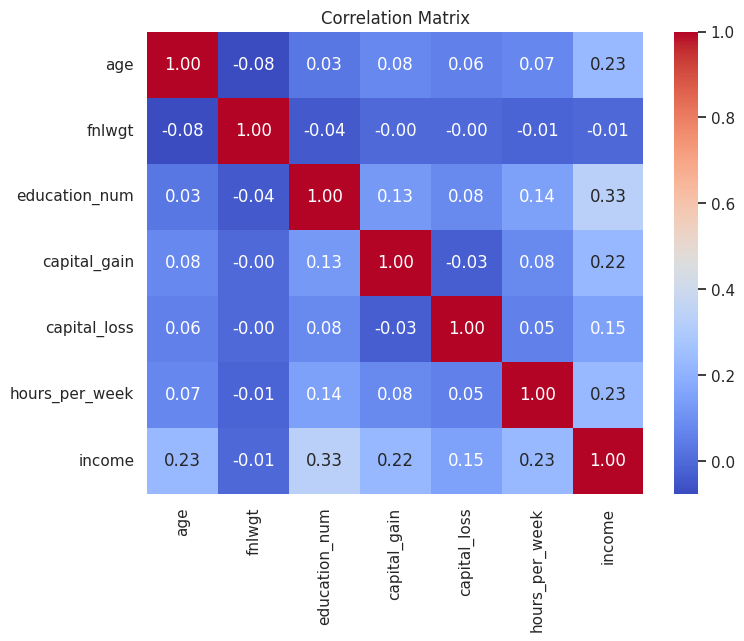

🔍 Insight: Education_num, capital_gain, and hours_per_week have the strongest positive correlation with income.


In [28]:
# === 3. EXPLORATORY DATA ANALYSIS (EDA) ===
sns.set(style="whitegrid")

# Income distribution
plt.figure(figsize=(5, 4))
sns.countplot(x="income", data=df)
plt.title("Income Distribution")
plt.show()
print("\n🔍 Insight: The dataset is imbalanced, with the majority earning <=50K.")

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
print("🔍 Insight: Education_num, capital_gain, and hours_per_week have the strongest positive correlation with income.")

In [29]:
# === 4. ENCODING & SCALING ===
df_encoded = pd.get_dummies(df, columns=[
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country"
])

# Scale numeric features EXCEPT target
numeric_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
features_to_scale = [col for col in numeric_cols if col != "income"]

scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

In [30]:
# Save modeling-ready dataset
# Update file path for your local machine
# df_encoded.to_csv(r"C:\Users\User\Downloads\census+income\cleaned_data_encoded_scaled.csv", index=False)
df_encoded.to_csv(r"C:\Users\celin\OneDrive\Education\USD-MS-ADS\ADS-504\Final-Project\cleaned_raw_full.csv", index=False)


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7363
           1       0.73      0.61      0.66      2395

    accuracy                           0.85      9758
   macro avg       0.81      0.77      0.78      9758
weighted avg       0.84      0.85      0.84      9758

Cross-Validation Accuracy (Mean ± Std): 0.8524 ± 0.0024


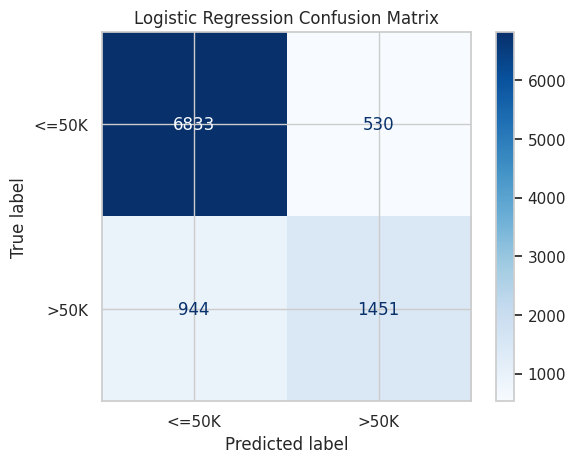


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7363
           1       0.72      0.64      0.68      2395

    accuracy                           0.85      9758
   macro avg       0.80      0.78      0.79      9758
weighted avg       0.85      0.85      0.85      9758

Cross-Validation Accuracy (Mean ± Std): 0.8527 ± 0.0018


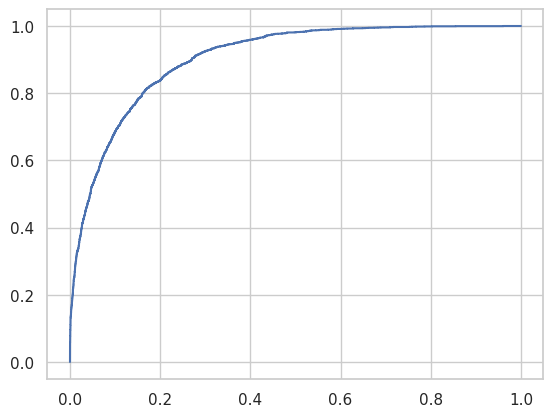

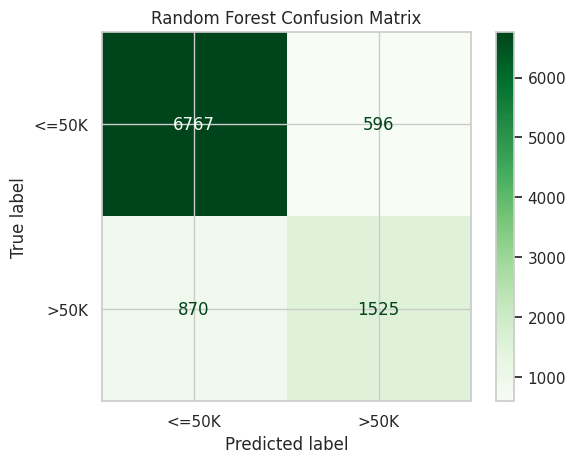

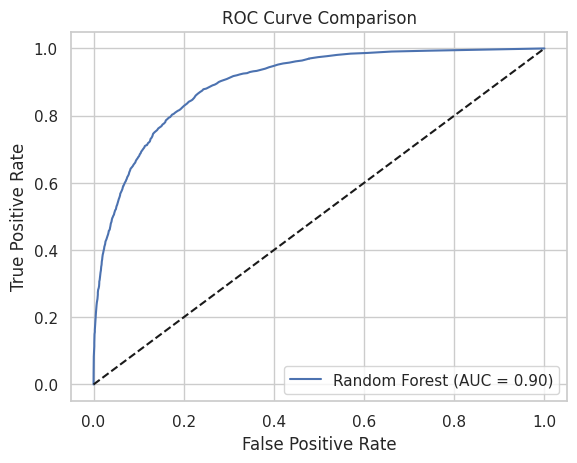


📊 Model Performance Comparison:
                 Model  CV Mean Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression          0.852429       0.848944   0.732458  0.605846   
1        Random Forest          0.852736       0.849764   0.719000  0.636743   

   F1 Score       AUC  
0  0.663163  0.904322  
1  0.675376  0.898896  

✅ Best performing model: Random Forest with 0.8498 accuracy and 0.8989 AUC.
💡 Insight: Logistic Regression is easier to interpret, while Random Forest may capture complex feature interactions better.


In [31]:
# === 5. TRAIN/TEST SPLIT ===
X = df_encoded.drop("income", axis=1)
y = df_encoded["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 6. MODELING & VALIDATION ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    results.append({
        "Model": name,
        "CV Mean Accuracy": cv_scores.mean(),
        "Test Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC": auc_score
    })

    # Classification report
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))
    print(f"Cross-Validation Accuracy (Mean ± Std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Confusion Matrix
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["<=50K", ">50K"]).plot(
        cmap='Blues' if name=="Logistic Regression" else 'Greens'
    )
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

# === 7. ROC Curve Comparison ===
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# === 8. MODEL PERFORMANCE COMPARISON TABLE ===
results_df = pd.DataFrame(results)
print("\n📊 Model Performance Comparison:")
print(results_df)

# === 9. BEST MODEL SELECTION & INSIGHTS ===
best_model = results_df.sort_values(by="Test Accuracy", ascending=False).iloc[0]
print(f"\n✅ Best performing model: {best_model['Model']} "
      f"with {best_model['Test Accuracy']:.4f} accuracy and {best_model['AUC']:.4f} AUC.")
print("💡 Insight: Logistic Regression is easier to interpret, "
      "while Random Forest may capture complex feature interactions better.")

In [58]:
# Set the number of clusters
n_clusters = 3

# Drop rows with any missing values for KMeans
df_encoded_cleaned = df_encoded.dropna().copy()

# Create and fit the k-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_encoded_cleaned)

# Evaluate clustering quality (silhouette score)
silhouette_avg = silhouette_score(df_encoded_cleaned, cluster_labels)
print(f"Silhouette score: {silhouette_avg:.3f}")

# Attach cluster names to data
df_with_clusters = df_encoded_cleaned.copy()
df_with_clusters['cluster'] = cluster_labels

# View the first few cluster assignments
print(df_with_clusters.head())

Silhouette score: 0.569
    AGEP  SEX  RAC1P  HISP    PINCP  SCHL  CIT  NATIVITY    YOEP  MSP  ESR  \
34    23    1      7     1  46400.0  16.0    2         1  2018.0  6.0  4.0   
35    35    1      9     2  40000.0  13.0    5         2  2023.0  6.0  1.0   
41    61    1      9     2  12000.0  19.0    5         2  1983.0  6.0  6.0   
65    22    1      9     2  15000.0  11.0    5         2  2021.0  6.0  6.0   
77    19    1      8     2  20000.0  16.0    4         2  2005.0  6.0  1.0   

    MAR    OCCP    INDP  WKHP  DIS  REGION  PINCP_yeojohnson  cluster  
34    5  7140.0  9770.0  60.0    1       4       3986.285100        0  
35    5  6050.0   170.0  30.0    2       4       3569.352597        0  
41    5  6260.0   770.0  40.0    2       4       1456.462594        0  
65    5  6050.0   170.0  21.0    1       4       1719.751065        0  
77    5  4140.0  8680.0  40.0    2       4       2130.551264        0  


In [59]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df_encoded_cleaned)
sse_kmeans = kmeans.inertia_  # sum of squared distances to centroid
print(f"K-Means SSE: {sse_kmeans}")

K-Means SSE: 15153056674223.705


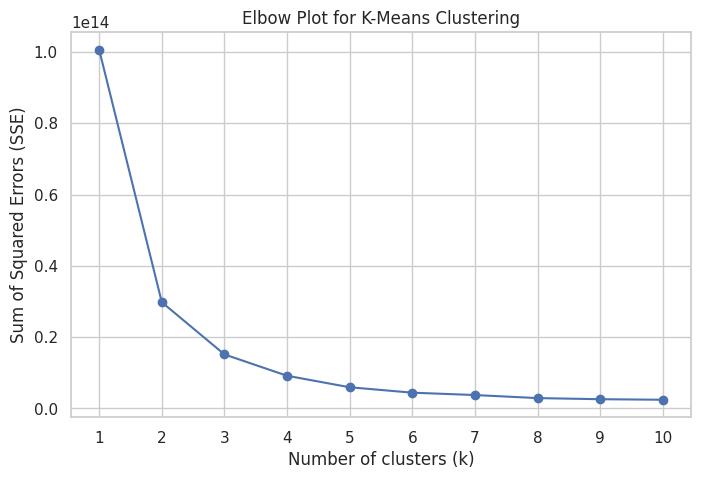

In [60]:
# Specify the range of clusters to try
k_range = range(1, 11)
sse = []

# Calculate K-Means SSE for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded_cleaned)
    sse.append(kmeans.inertia_)  # inertia_ is the SSE

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Plot for K-Means Clustering')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [61]:
# Scale the data first
X_scaled = StandardScaler().fit_transform(df_encoded_cleaned)

# Initialize DBSCAN with parameters:
# eps = radius for neighborhood search
# min_samples = minimum points to form a dense region (core point)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN model and get cluster labels
clusters = dbscan.fit_predict(X_scaled)

# clusters is an array of cluster labels for each point
# -1 means noise (outlier) point not assigned to any cluster
print("Cluster labels:", clusters)

Cluster labels: [-1  0 -1 ... -1 -1 -1]


In [62]:
# Calculate silhouette score for DBSCAN (excluding noise points)
# Noise points are labeled as -1
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
dbscan_labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Calculate silhouette score if possible (requires at least 2 clusters and no noise)
# Filter out noise points (-1) for silhouette score calculation
mask = dbscan_labels != -1
if n_clusters_ > 1:
    silhouette_dbscan = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    print(f"DBSCAN silhouette score (excluding noise): {silhouette_dbscan:.3f}")
else:
    print("DBSCAN silhouette score: Not applicable (only one cluster or noise).")

Estimated number of clusters: 262
Estimated number of noise points: 56485
DBSCAN silhouette score (excluding noise): 0.066
